In [38]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_colwidth = 500


In [2]:
s3_prefix = 's3://olgabot-maca/facs/sourmash_compare_combined/'
txt = 'aws_s3_ls_sourmash_compare_combined.txt'


! aws s3 ls --human-readable $s3_prefix > $txt
! cat $txt

2018-09-21 15:07:50      71362 -cell-metadata.csv
2018-09-21 15:07:50      54127 -experiment-metadata.csv
2018-09-21 14:10:45          0 -similarity.parquet
2018-09-23 16:24:15      71362 cell-metadata.csv
2018-09-23 20:57:57       8311 experiment-metadata-scaled-subset.csv
2018-09-23 16:24:15      54127 experiment-metadata.csv
2018-09-23 20:58:31  744497417 similarity-scaled-subset.parquet
2018-09-23 16:34:26 46405767958 similarity.csv
2018-09-23 19:09:56 4521742543 similarity.parquet


In [12]:
%time similarity = pd.read_csv(f'{s3_prefix}similarity-scaled-subset.csv')
print(similarity.shape)
similarity.head()

CPU times: user 1min 55s, sys: 31.6 s, total: 2min 27s
Wall time: 11min 50s
(66531415, 6)


,Unnamed: 0,cell_id,other_cell,similarity,experiment,ignore_abundance
0,0,B22-MAA000871-3_11_M-1-1,B22-MAA000871-3_11_M-1-1,1.000000,trim=false_scaled=1000_dna_ksize=12,True
1,1,B22-MAA000871-3_11_M-1-1,L11-MAA000586-3_8_M-1-1,0.398906,trim=false_scaled=1000_dna_ksize=12,True
2,2,B22-MAA000871-3_11_M-1-1,O20-MAA001632-3_56_F-1-1,0.407873,trim=false_scaled=1000_dna_ksize=12,True
3,3,B22-MAA000871-3_11_M-1-1,D2-MAA000452-3_8_M-1-1,0.386677,trim=false_scaled=1000_dna_ksize=12,True
4,4,B22-MAA000871-3_11_M-1-1,P1-D042473-3_10_M-1-1,0.384180,trim=false_scaled=1000_dna_ksize=12,True


Can't read parquet file, known issue (https://github.com/apache/arrow/issues/1677):

```
---------------------------------------------------------------------------
ArrowIOError                              Traceback (most recent call last)
<ipython-input-8-f83e6103576f> in <module>()
----> 1 similarity = pd.read_parquet(f'{s3_prefix}similarity-scaled-subset.parquet', engine='pyarrow')
      2 print(similarity.shape)
      3 similarity.head()

~/miniconda3/lib/python3.6/site-packages/pandas/io/parquet.py in read_parquet(path, engine, columns, **kwargs)
    286 
    287     impl = get_engine(engine)
--> 288     return impl.read(path, columns=columns, **kwargs)

~/miniconda3/lib/python3.6/site-packages/pandas/io/parquet.py in read(self, path, columns, **kwargs)
    129             kwargs['use_pandas_metadata'] = True
    130             result = self.api.parquet.read_table(path, columns=columns,
--> 131                                                  **kwargs).to_pandas()
    132         if should_close:
    133             try:

~/miniconda3/lib/python3.6/site-packages/pyarrow/parquet.py in read_table(source, columns, nthreads, metadata, use_pandas_metadata)
    939     pf = ParquetFile(source, metadata=metadata)
    940     return pf.read(columns=columns, nthreads=nthreads,
--> 941                    use_pandas_metadata=use_pandas_metadata)
    942 
    943 

~/miniconda3/lib/python3.6/site-packages/pyarrow/parquet.py in read(self, columns, nthreads, use_pandas_metadata)
    148             columns, use_pandas_metadata=use_pandas_metadata)
    149         return self.reader.read_all(column_indices=column_indices,
--> 150                                     nthreads=nthreads)
    151 
    152     def scan_contents(self, columns=None, batch_size=65536):

_parquet.pyx in pyarrow._parquet.ParquetReader.read_all()

error.pxi in pyarrow.lib.check_status()

ArrowIOError: Arrow error: Invalid: BinaryArray cannot contain more than 2147483646 bytes, have 2147483679

```

In [10]:
# similarity = pd.read_parquet(f'{s3_prefix}similarity-scaled-subset.parquet', engine='pyarrow')
# print(similarity.shape)
# similarity.head()

In [11]:
# similarity = pd.read_parquet(f'{s3_prefix}similarity-scaled-subset.parquet', engine='fastparquet')
# print(similarity.shape)
# similarity.head()

In [26]:
experiment_metadata = pd.read_csv(f'{s3_prefix}experiment-metadata-scaled-subset.csv', index_col=0)
print(experiment_metadata.shape)
experiment_metadata.head()

(160, 4)


,comparison_sequence,ksize,scaled,trim
trim=false_scaled=1000_dna_ksize=12,dna,12,1000,False
trim=false_scaled=1000_dna_ksize=15,dna,15,1000,False
trim=false_scaled=1000_dna_ksize=18,dna,18,1000,False
trim=false_scaled=1000_dna_ksize=21,dna,21,1000,False
trim=false_scaled=1000_dna_ksize=24,dna,24,1000,False


In [30]:
experiment_metadata.comparison_sequence.unique()

array(['dna'], dtype=object)

In [45]:
cell_metadata = pd.read_csv(f'{s3_prefix}cell-metadata.csv', index_col=0)
print(cell_metadata.shape)
cell_metadata.head()

(1000, 4)


,tissue,subtissue,cell_ontology_class,free_annotation
cell_id,,,,
A1-B002427-3_39_F-1-1,Heart,LA,myofibroblast_cell,NaN
A1-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell
A1-MAA000496-3_10_M-1-1,Trachea,NaN,mesenchymal_cell,NaN
A1-MAA000549-3_8_M-1-1,Skin,Anagen,epidermal_cell,Intermediate_IFE
A1-MAA001869-3_38_F-1-1,Large_Intestine,Proximal,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell


In [40]:
cell_metdata.query('tissue == "Lung"')

,tissue,subtissue,cell_ontology_class,free_annotation
cell_id,,,,
A15-MAA000891-3_10_M-1-1,Lung,NaN,NaN,lung_neuroendocrine_cells_and_unknown_cells
A19-MAA000891-3_10_M-1-1,Lung,NaN,classical_monocyte,invading_monocytes
A7-MAA001847-3_39_F-1-1,Lung,EPCAM,epithelial_cell_of_lung,"alveolar_epithelial_type_1_cells,_alveolar_epithelial_type_2_cells,_club_cells,_and_basal_cells"
B15-MAA001892-3_38_F-1-1,Lung,Endomucin,lung_endothelial_cell,NaN
C11-MAA001847-3_39_F-1-1,Lung,EPCAM,stromal_cell,NaN
D12-MAA000839-3_11_M-1-1,Lung,NaN,stromal_cell,NaN
G1-D043522-3_39_F-1-1,Lung,Endomucin,lung_endothelial_cell,NaN
G12-MAA001889-3_38_F-1-1,Lung,EPCAM,myeloid_cell,"dendritic_cells,_alveolar_macrophages,_and_interstital_macrophages"
G3-MAA000839-3_11_M-1-1,Lung,NaN,lung_endothelial_cell,NaN


In [15]:
similarity.head()

,Unnamed: 0,cell_id,other_cell,similarity,experiment,ignore_abundance
0,0,B22-MAA000871-3_11_M-1-1,B22-MAA000871-3_11_M-1-1,1.000000,trim=false_scaled=1000_dna_ksize=12,True
1,1,B22-MAA000871-3_11_M-1-1,L11-MAA000586-3_8_M-1-1,0.398906,trim=false_scaled=1000_dna_ksize=12,True
2,2,B22-MAA000871-3_11_M-1-1,O20-MAA001632-3_56_F-1-1,0.407873,trim=false_scaled=1000_dna_ksize=12,True
3,3,B22-MAA000871-3_11_M-1-1,D2-MAA000452-3_8_M-1-1,0.386677,trim=false_scaled=1000_dna_ksize=12,True
4,4,B22-MAA000871-3_11_M-1-1,P1-D042473-3_10_M-1-1,0.384180,trim=false_scaled=1000_dna_ksize=12,True


In [31]:
similarity.ignore_abundance.unique()

array([ True, False])

In [16]:
tissue_colors = pd.read_csv('/home/olga/tabula-muris/00_data_ingest/15_color_palette/tissue_colors.csv', 
                            squeeze=True, index_col=0)
tissue_colors.head()

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Diaphragm            #2ca02c
Name: color, dtype: object

In [28]:
%time similarity_metadata = similarity.join(experiment_metadata, on='experiment')
print(similarity_metadata.shape)
similarity_metadata.head()

CPU times: user 1min 13s, sys: 26.2 s, total: 1min 39s
Wall time: 31.7 s
(66531415, 10)


,Unnamed: 0,cell_id,other_cell,similarity,experiment,ignore_abundance,comparison_sequence,ksize,scaled,trim
0,0,B22-MAA000871-3_11_M-1-1,B22-MAA000871-3_11_M-1-1,1.000000,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
1,1,B22-MAA000871-3_11_M-1-1,L11-MAA000586-3_8_M-1-1,0.398906,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
2,2,B22-MAA000871-3_11_M-1-1,O20-MAA001632-3_56_F-1-1,0.407873,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
3,3,B22-MAA000871-3_11_M-1-1,D2-MAA000452-3_8_M-1-1,0.386677,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
4,4,B22-MAA000871-3_11_M-1-1,P1-D042473-3_10_M-1-1,0.384180,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False


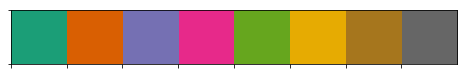

In [37]:
ksize_kwargs = dict(hue='ksize', palette='magma', col='scaled',
                    row='ignore_abundance', margin_titles=True)


import matplotlib as mpl

dark2 = sns.color_palette('Dark2')
dark2 = [mpl.colors.rgb2hex(x) for x in dark2]
sns.palplot(dark2)

tissue_kws_no_highlight = dict(col='ksize', hue='tissue', row='ignore_abundance',
              palette=tissue_colors, margin_titles=True, hue_order=tissue_colors.index)



def make_tissue_kwargs(highlight_tissue):
    """All tissue colors are grey except for the highlighted one"""
    highlight_colors = tissue_colors.copy()
    highlight_colors[highlight_colors.index != highlight_tissue] = 'lightgrey'
    highlight_colors[highlight_tissue] = dark2[3]

    hue_order = highlight_colors.index.difference([highlight_tissue]).tolist()
    hue_order.append(highlight_tissue)

    palette = highlight_colors[hue_order]

    kwargs = dict(hue='tissue', palette=palette, 
                      hue_order=hue_order, row='seq', margin_titles=True, col='ksize')    
    return kwargs


def make_cell_ontology_kwargs(cell_ontology):

    cell_ontology_hue_order = set(search_results_annotated.cell_ontology_class.unique()).difference([cell_ontology])
    cell_ontology_hue_order = list(cell_ontology_hue_order)
    cell_ontology_hue_order.append(cell_ontology)
    cell_ontology_hue_order

    cell_ontology_palette = pd.Series('lightgrey', index=cell_ontology_hue_order)
    cell_ontology_palette[cell_ontology] = dark2[0]
    cell_ontology_palette

    cell_ontology_kws = dict(hue='cell_ontology_class', palette=cell_ontology_palette, 
                      hue_order=cell_ontology_hue_order, row='ignore_abundance', margin_titles=True, col='ksize')
    return cell_ontology_kws

/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


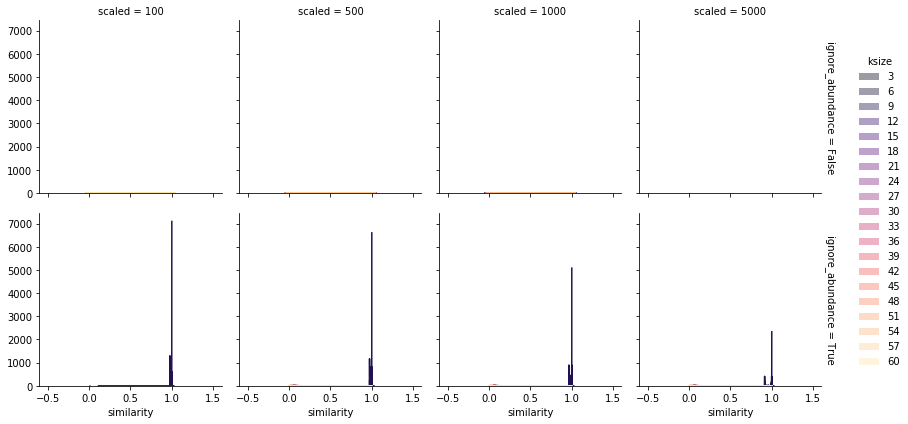

In [33]:
g = sns.FacetGrid(similarity_metadata, **ksize_kwargs)
g.map(sns.distplot, 'similarity')
g.set(xlim=(-0.05, 1.05))
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


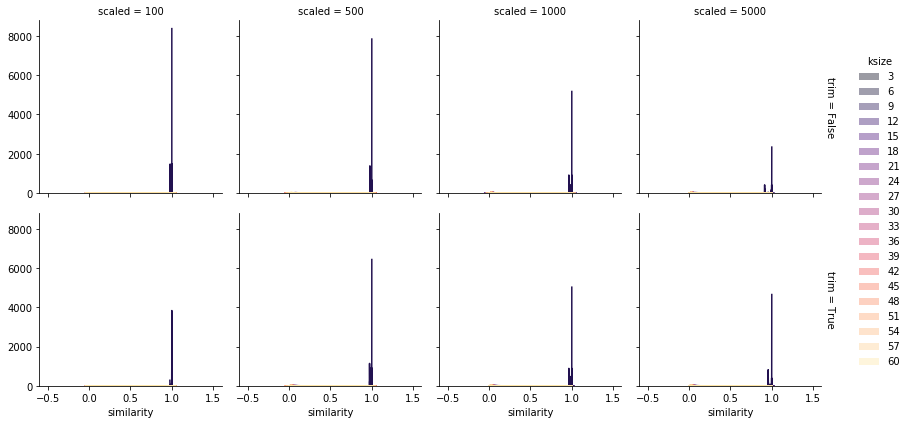

In [34]:
ksize_kwargs = dict(hue='ksize', palette='magma', col='scaled',
                    row='trim', margin_titles=True)

g = sns.FacetGrid(similarity_metadata, **ksize_kwargs)
g.map(sns.distplot, 'similarity')
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


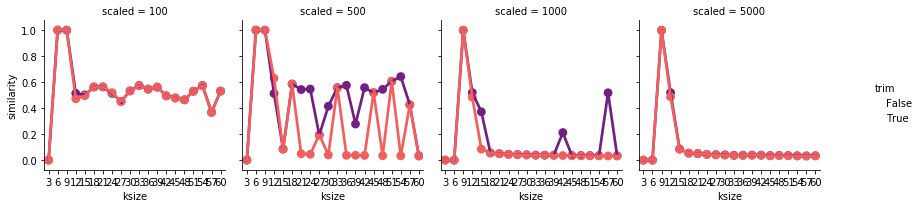

In [36]:
ksize_kwargs = dict(hue='trim', palette='magma', col='scaled', margin_titles=True)

g = sns.FacetGrid(similarity_metadata, **ksize_kwargs)
g.map(sns.pointplot, 'ksize', 'similarity', stat_func=np.median)
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


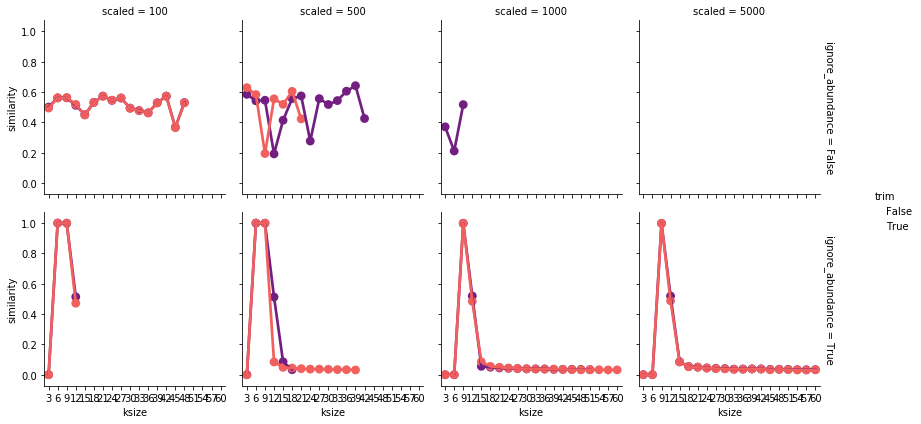

In [39]:
ksize_kwargs = dict(hue='trim', palette='magma', col='scaled', margin_titles=True, row='ignore_abundance')

g = sns.FacetGrid(similarity_metadata, **ksize_kwargs)
g.map(sns.pointplot, 'ksize', 'similarity', stat_func=np.median)
g.add_legend()

In [43]:
similarity_metadata.head()

,Unnamed: 0,cell_id,other_cell,similarity,experiment,ignore_abundance,comparison_sequence,ksize,scaled,trim
0,0,B22-MAA000871-3_11_M-1-1,B22-MAA000871-3_11_M-1-1,1.000000,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
1,1,B22-MAA000871-3_11_M-1-1,L11-MAA000586-3_8_M-1-1,0.398906,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
2,2,B22-MAA000871-3_11_M-1-1,O20-MAA001632-3_56_F-1-1,0.407873,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
3,3,B22-MAA000871-3_11_M-1-1,D2-MAA000452-3_8_M-1-1,0.386677,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False
4,4,B22-MAA000871-3_11_M-1-1,P1-D042473-3_10_M-1-1,0.384180,trim=false_scaled=1000_dna_ksize=12,True,dna,12,1000,False


In [46]:
cell_metadata.loc['B22-MAA000871-3_11_M-1-1']

tissue                                        Large_Intestine
subtissue                                            Proximal
cell_ontology_class        epithelial_cell_of_large_intestine
free_annotation        Lgr5-_amplifying_undifferentiated_cell
Name: B22-MAA000871-3_11_M-1-1, dtype: object

In [47]:
cell_metadata.query('tissue == "Bladder"')

,tissue,subtissue,cell_ontology_class,free_annotation
cell_id,,,,
A1-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell
A13-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell
A7-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell
A8-MAA000487-3_10_M-1-1,Bladder,NaN,bladder_urothelial_cell,Luminal_bladder_epithelial_cell
B22-MAA000487-3_10_M-1-1,Bladder,NaN,bladder_urothelial_cell,Luminal_bladder_epithelial_cell
B3-MAA000487-3_10_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell
C11-MAA000487-3_10_M-1-1,Bladder,NaN,bladder_urothelial_cell,Luminal_bladder_epithelial_cell
C16-D041914-3_8_M-1-1,Bladder,NaN,bladder_urothelial_cell,Luminal_bladder_epithelial_cell
C8-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell


A1-D041914-3_8_M-1-1


/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyError: 'seq'

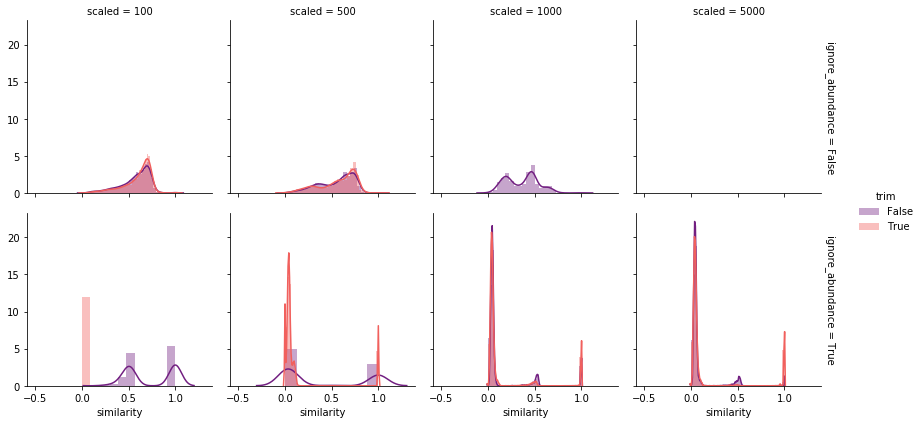

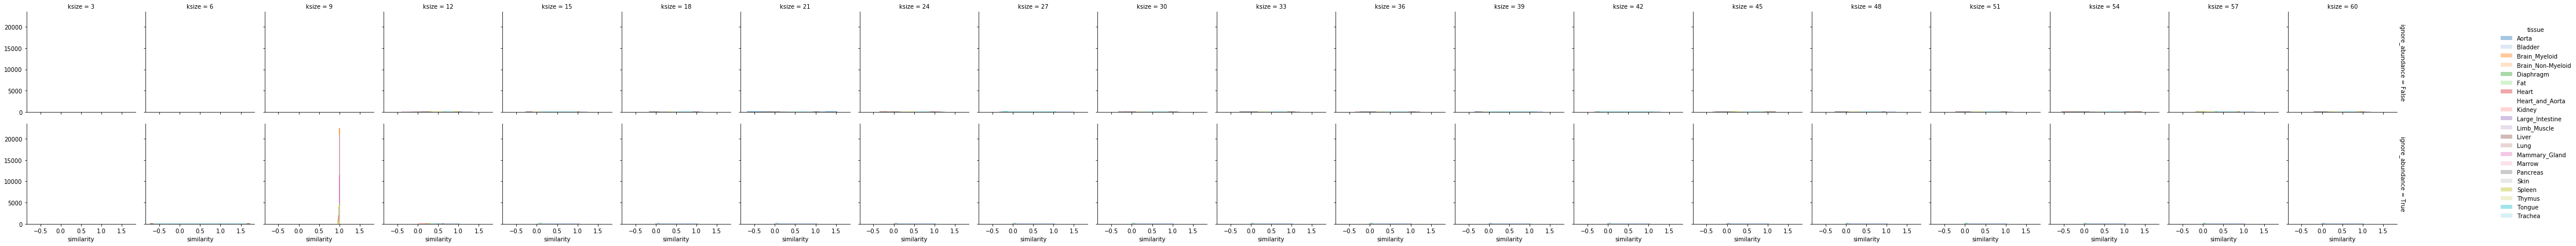

In [49]:
bladder_cell = 'A1-D041914-3_8_M-1-1'

type_b_pancreatic_cell = 'F12-MAA000574-3_8_M-1-1'

cell_ids = bladder_cell, type_b_pancreatic_cell

for cell_id in cell_ids:
    print(cell_id)
    cell_similarity = similarity_metadata.query('cell_id == @cell_id')
    cell_similarity = cell_similarity.join(cell_metadata, on='other_cell')
    
    g = sns.FacetGrid(cell_similarity, **ksize_kwargs)
    g.map(sns.distplot, 'similarity')
    g.add_legend()
    
    
    g = sns.FacetGrid(cell_similarity, **tissue_kws_no_highlight)
    g.map(sns.distplot, 'similarity')
    g.add_legend()
    
    tissue = cell_metadata.loc[cell_id, 'tissue']
    tissue_kws = make_tissue_kwargs(tissue)
    
    g = sns.FacetGrid(cell_similarity, **tissue_kws)
    g.map(sns.distplot, 'similarity')
    g.add_legend()
    
    cell_ontology = cell_metadata.loc[cell_id, 'cell_ontology_class']
    cell_ontology_kws = make_cell_ontology_kwargs(cell_ontology)
    
    g = sns.FacetGrid(cell_similarity, **cell_ontology_kws)
    g.map(sns.distplot, 'similarity')
    g.add_legend()
